In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import glob 

['quantification/SK037-1-1.csv',
 'quantification/SK037-1-3.csv',
 'quantification/SK037-1-2.csv',
 'quantification/SK037-1-6.csv',
 'quantification/SK037-1-5.csv',
 'quantification/SK037-1-4.csv',
 'quantification/SK037-2-1.csv',
 'quantification/SK037-0-3.csv',
 'quantification/SK037-0-2.csv',
 'quantification/SK037-2-2.csv',
 'quantification/SK037-4-4.csv',
 'quantification/SK037-4-5.csv',
 'quantification/SK037-0-1.csv',
 'quantification/SK037-2-3.csv',
 'quantification/SK037-6-3.csv',
 'quantification/SK037-4-1.csv',
 'quantification/SK037-6-2.csv',
 'quantification/SK037-0-4.csv',
 'quantification/SK037-2-4.csv',
 'quantification/SK037-4-2.csv',
 'quantification/SK037-4-3.csv',
 'quantification/SK037-6-1.csv',
 'quantification/SK037-2-5.csv']

Area      Mean time
                         
1    9.261  4224.190    1
2    8.129  2972.189    1
3    8.484  3546.032    1
4    8.991  2758.340    1
5    8.822  3393.747    1
..     ...       ...  ...
122  2.670  2068.076    2
123  4.309  1396.753    2
124  2.282  1181.089    2
125  5.847  3514.292    2
126  1.825  1110.111    2

[2958 rows x 3 columns]

time     Area       Mean
0    0   7.0980  2524.1135
1    1   6.8950  2692.9035
2    2   7.7910  2424.1615
3    4   9.2025  1922.4780
4    6  10.9425  2136.0615

Area  Mean
time            
0      580   580
1      560   560
2      588   588
4      560   560
6      670   670

/Users/sakaikeiichirou/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/sakaikeiichirou/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/sakaikeiichirou/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

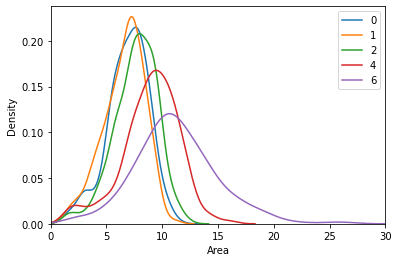

In [35]:
flist =  glob.glob("quantification/*.csv")
display(flist)
df = pd.DataFrame()

for i in flist:
    data_tmp = pd.read_csv(i,index_col=0)
    data_tmp["time"] = i[21:-6]
    df = pd.concat([df,data_tmp])
display(df)

display(df.groupby("time",as_index=False).median())
display(df.groupby("time").count())

timepoint = ["0","1","2","4","6"]
for i in timepoint:
    df_tmp = df[df["time"]==i]
    sns.distplot(df_tmp[ "Area"],label=i,hist=False)
    plt.xlim(0,30)
    plt.legend()
plt.savefig("20230411-SK037-cell-volume.pdf")